In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%config InlineBackend.figure_format = 'retina'

In [2]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['text.latex.preamble'] = '\\usepackage{amsmath,amssymb}'

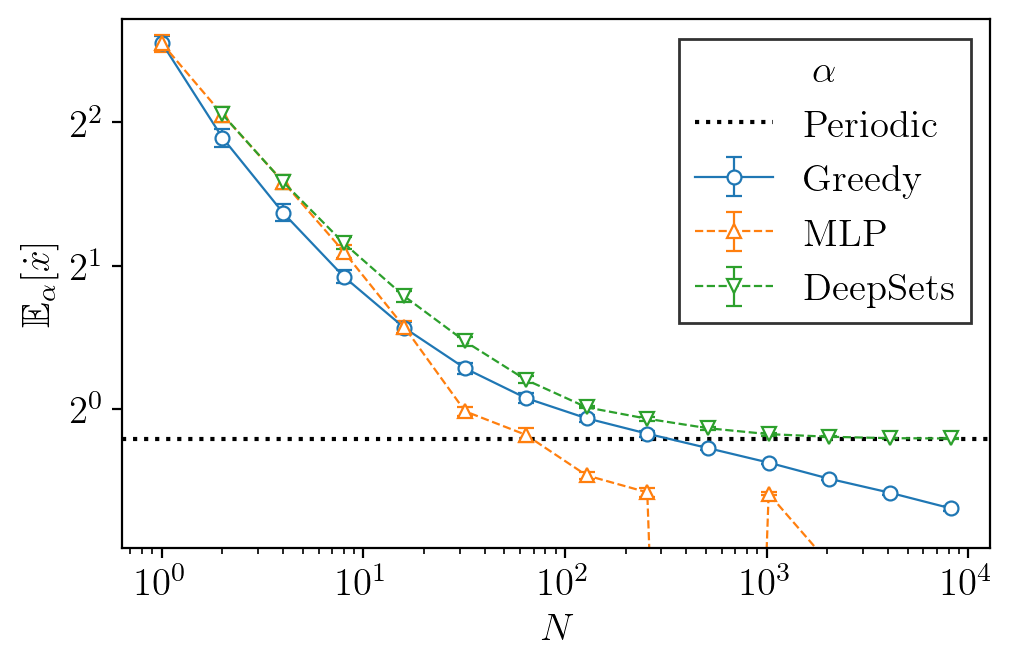

In [3]:
drl_df = pd.read_csv('results/drl_policy.csv')
greedy_df = pd.read_csv('results/greedy_policy.csv')

plt.figure(figsize=(3.5*1.6,3.5))
periodic = 0.8623850363281251

markers = ['^', 'v']
kwargs = {'capsize': 3, 'lw':0.8, 'mfc': 'white', 'mew':0.8, 'ms': 5}
plt.errorbar(greedy_df.N, greedy_df.AvgRet, yerr=greedy_df.StdRet,
             marker='o', color='C0', label='Greedy', ls='-', **kwargs)
arch_names = {'mlp': 'MLP', 'ds': 'DeepSets'}

for n, a in enumerate(['mlp', 'ds']):
    f = (drl_df['arch']==a)
    _df = drl_df[f]
    xs = []
    ys = []
    yerrs = []
    for row, data in _df.groupby(by='N'):
        i = data['AvgRet'].idxmax()
        xs.append(row)
        ys.append(data.loc[i]['AvgRet'])
        yerrs.append(data.loc[i]['StdRet'])
    plt.errorbar(xs, ys, yerrs,
                 ls='--', 
                 color='C%d' %(n+1), 
                 marker=markers[n], 
                 label='%s' %arch_names[a], 
                 **kwargs)
    
plt.axhline(periodic, ls=':', color='black', label='Periodic')
plt.semilogx()
plt.yscale('log', base=2)
plt.ylim(0.17*3, 2.2*3)
plt.xlabel('$N$')
plt.ylabel(r'$\mathbb{E}_\alpha[\dot{x}]$')
plt.legend(title=r'$\alpha$')
plt.show()